# Работа с текстом на естественном языке.


Пример работы word2vec

In [95]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

#lang_model = api.load("glove-twitter-25")
lang_model = api.load("glove-wiki-gigaword-100")

In [96]:
# king + (woman - man)
lang_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [97]:
lang_model.most_similar(positive=['russia', 'paris'], negative=['moscow'], topn=10)

[('france', 0.8784569501876831),
 ('french', 0.6961610317230225),
 ('britain', 0.6948201656341553),
 ('europe', 0.6841811537742615),
 ('belgium', 0.6787702441215515),
 ('spain', 0.6482120752334595),
 ('switzerland', 0.643441379070282),
 ('italy', 0.6415969729423523),
 ('germany', 0.6362987160682678),
 ('prohertrib', 0.6314049363136292)]

Сентиментальный анализ текста

In [98]:
import pandas as pd
import numpy as np

sentiment_ds = pd.read_csv('https://raw.githubusercontent.com/WiMLDS/election-data-hackathon/master/first-gop-debate-twitter-sentiment/data/Sentiment.csv')

In [99]:
sentiment_small = sentiment_ds[['sentiment', 'text']]
sentiment_small.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [100]:
pos_neg_sentiment = sentiment_small[sentiment_small.sentiment != 'Neutral']
pos_neg_sentiment.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [101]:
from pandas.api.types import CategoricalDtype

clean_sentiment_ds = pos_neg_sentiment.copy()
clean_sentiment_ds.sentiment = clean_sentiment_ds.sentiment.astype(CategoricalDtype(categories = ['Negative', 'Positive'], ordered=True)).cat.codes
clean_sentiment_ds.head()

,sentiment,text
1,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,1,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,0,RT @warriorwoman91: I liked her and was happy ...


c:\Users\Sergey\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

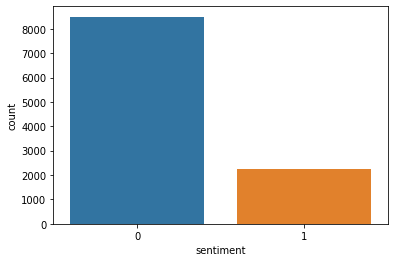

In [102]:
import seaborn as sns

sns.countplot(clean_sentiment_ds['sentiment'])

In [103]:
import re

def f(x):
    print(x + '\n')
    # x = x.lower()
    
    reg = r'(?<!\w)@[\w+]{1,15}\b'
    regHASHTAG = r'(?<!\w)#[\w+]{1,15}\b'

    x = re.sub(r'RT', '', x, re.M)
    x = re.sub(r':+', '', x, re.M)
    x = re.sub(r'w/', '', x, re.M)

    # x = re.sub(reg, '', x)
    # x = re.sub(regHASHTAG, '', x)
    # x = re.sub('\n[^\,\'\w\s\d]', '', x)
    # x = x[3:]
    # x = re.sub(' +', ' ', x)
    # x = x.strip()
    # print('AFTER:\t' + x)
    return x

clean_sentiment_ds['text'] = clean_sentiment_ds['text'].apply(f)

RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…

RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …

RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…

RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews

RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…

Deer in the headlights RT @lizzwinstead: Ben Carson, may be the only brain surgeon who has performed a lobotomy on himself. #GOPDebate

RT @NancyOsborne180: Last night's debate proved it! #GOPDebate #BATsAsk @BadassTeachersA #TBATs  https://t.co/G2gGjY1bJD

@JGreenDC @realDonaldTrump In all fai

In [104]:
clean_sentiment_ds.head(20)

,sentiment,text
1,1,@ScottWalker Didn't catch the full #GOPdebate...
3,1,@RobGeorge That Carly Fiorina is trending -- ...
4,1,@DanScavino #GOPDebate @realDonaldTrump deli...
5,1,"@GregAbbott_TX @TedCruz ""On my first day I wi..."
6,0,@warriorwoman91 I liked her and was happy whe...
8,0,Deer in the headlights @lizzwinstead Ben Cars...
9,0,@NancyOsborne180 Last night's debate proved i...
10,0,@JGreenDC @realDonaldTrump In all fairness #Bi...
11,1,@WayneDupreeShow Just woke up to tweet this o...
12,0,Me reading my family's comments about how grea...


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = clean_sentiment_ds['text']
sentiment = clean_sentiment_ds['sentiment']

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None, sublinear_tf=True, ngram_range=(1, 1))
embeddings = vectorizer.fit_transform(corpus)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, sentiment, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, plot_confusion_matrix, classification_report

In [108]:
model = LogisticRegression(penalty='l2', C=0.3, solver='lbfgs', max_iter=150, verbose=0, random_state=42)

In [109]:
model.fit(X_train, y_train)

c:\Users\Sergey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.3, max_iter=150, random_state=42)

In [110]:
print(classification_report(y_test, model.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1713
           1       0.68      0.55      0.61       433

    accuracy                           0.86      2146
   macro avg       0.79      0.74      0.76      2146
weighted avg       0.85      0.86      0.85      2146



1. Улучшить показатели precision, recall по 1.
2. Применить другие методы машинного обучения и сравнить результат.

## До изменений:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1713
           1       0.67      0.54      0.60       433

    accuracy                           0.85      2146
    macro avg      0.78      0.73      0.75      2146
    weighted avg   0.84      0.85      0.85      2146

## Decision Tree:

In [111]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=17)
tree.fit(X_train, y_train)

print(classification_report(y_test, tree.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1713
           1       0.75      0.21      0.33       433

    accuracy                           0.83      2146
   macro avg       0.79      0.60      0.62      2146
weighted avg       0.81      0.83      0.79      2146



## Метод соседей:

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

report = classification_report(y_test, pred_knn)
print (report)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1713
           1       0.40      0.52      0.45       433

    accuracy                           0.75      2146
   macro avg       0.63      0.66      0.64      2146
weighted avg       0.77      0.75      0.76      2146



## Логистическая регрессия:

In [113]:
logit = LogisticRegression(C=1, random_state=17, solver='liblinear')
logit.fit(X_train, y_train)

y_test_proba = logit.predict(X_test)

report = classification_report(y_test, y_test_proba)
print (report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1713
           1       0.64      0.55      0.59       433

    accuracy                           0.85      2146
   macro avg       0.77      0.73      0.75      2146
weighted avg       0.84      0.85      0.84      2146



## Лассо:

In [114]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

lasso.coef_

array([-0.,  0., -0., ..., -0., -0.,  0.])